### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

### Reading The Data

In [35]:
df = pd.read_csv("train.csv")
df[df.columns[:15]].head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5


In [36]:
df[df.columns[15:]].head()

,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,5,4,3,4,4,4,5,0,0.0,satisfied
3,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,3,3,4,4,3,3,3,0,0.0,satisfied


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()/len(df)*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [9]:
# Change the type of the columns from "object" into "category"
for i in df.columns:
    if df[i].dtypes == 'O':
        df[i] = df[i].astype('category')

In [10]:
df.dtypes

Unnamed: 0                              int64
id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                       

In [11]:
# Show the numerical values in the dataframe
num_values = df.select_dtypes(include = ['int64','float64'])
num_values

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


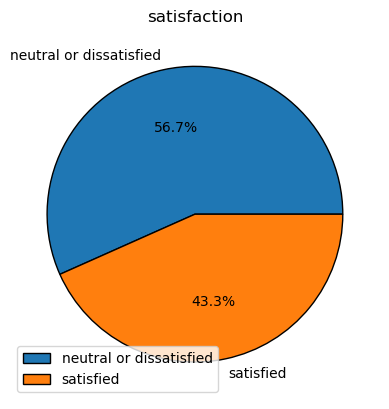

In [12]:
plt.pie(df.satisfaction.value_counts(), autopct = '%1.1f%%', wedgeprops = {'edgecolor' : 'black'}, labels =[ 'neutral or dissatisfied',"satisfied"] )
plt.title('satisfaction')
plt.legend()

<Axes: >

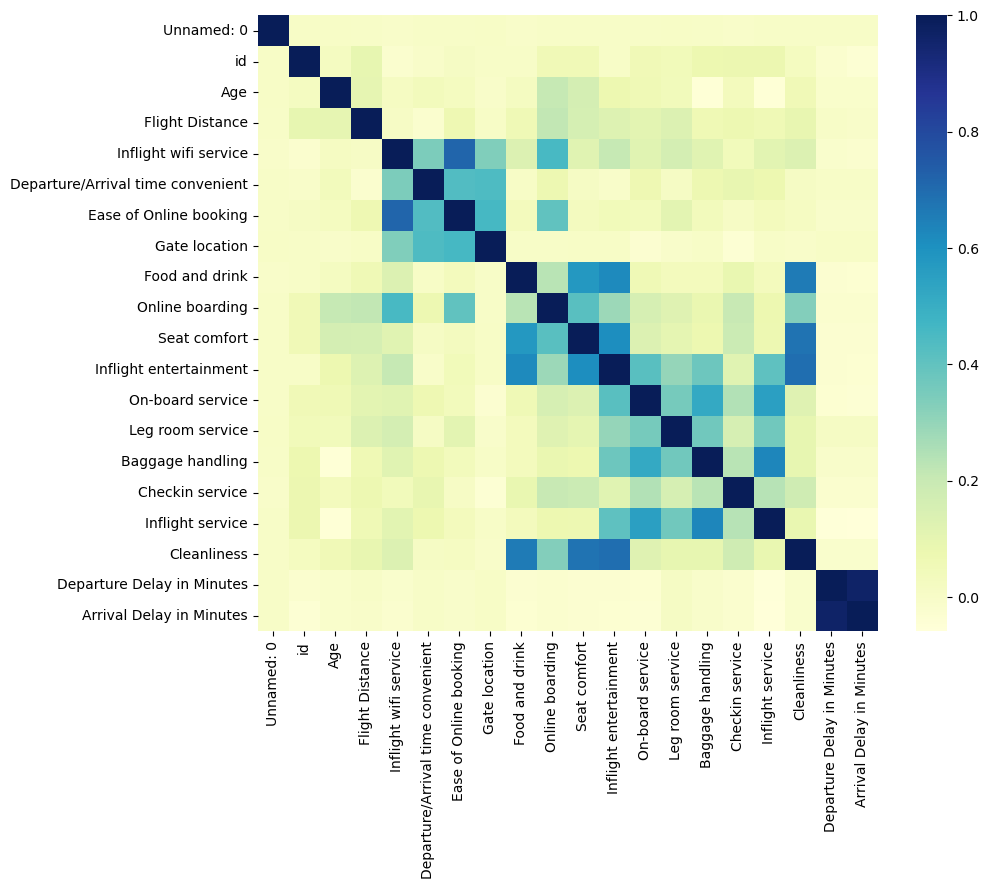

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(num_values.corr() ,cbar = True, cmap = 'YlGnBu')

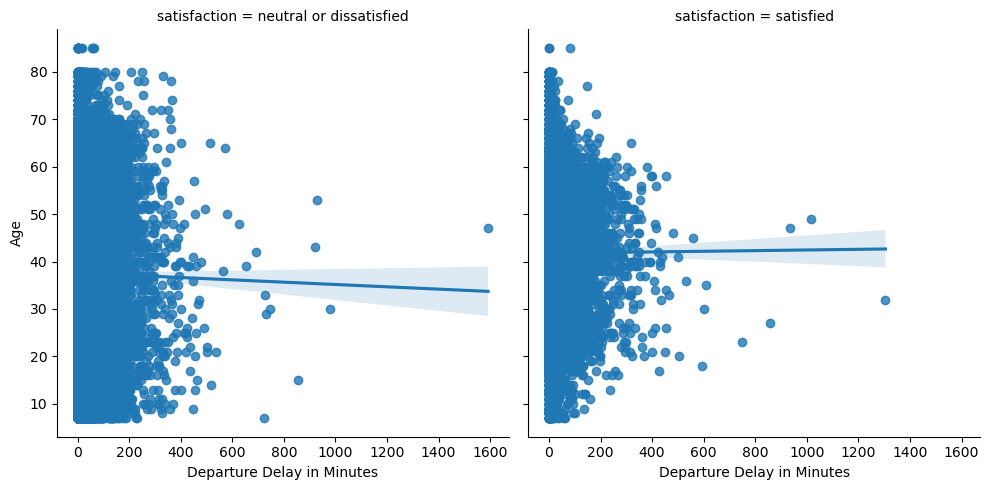

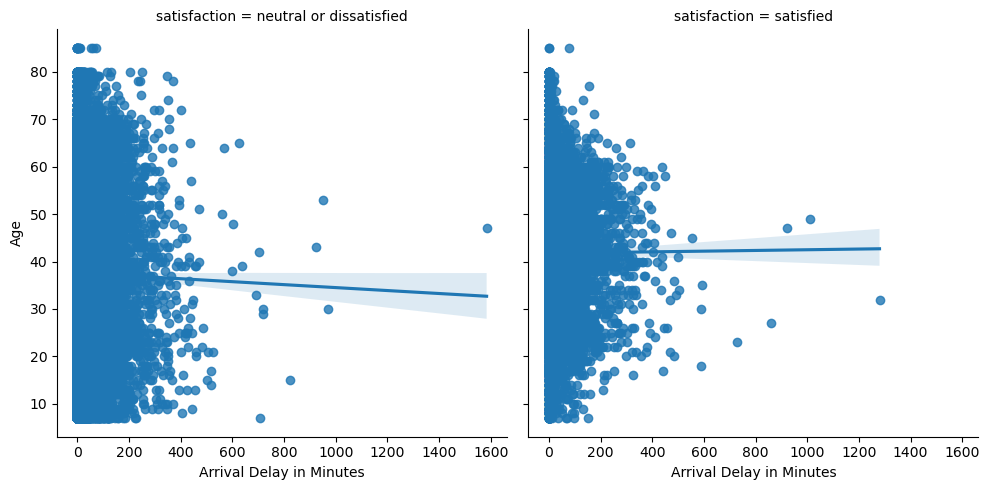

In [14]:
sns.lmplot(x = 'Departure Delay in Minutes', y = 'Age', col = 'satisfaction',data =df) 
sns.lmplot(x = 'Arrival Delay in Minutes', y = 'Age', col = 'satisfaction',data =df) 


In [40]:
# plt.fill_between(df['Arrival Delay in Minutes'],df['Departure Delay in Minutes'], interpolate = True, alpha = 0.25)

### As we see int the above figures, "Arrival Delay in Minutes","Departure Delay in Minutes" is almost the same.
So, we can drop one of them to make the data more simple.

In [41]:
df.drop('Arrival Delay in Minutes',axis = 1, inplace = True)
# We drop this column because it's is the onlu one that contain 'NaN' values

In [42]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


Text(0.5, 1.0, 'satisfaction by Gender')

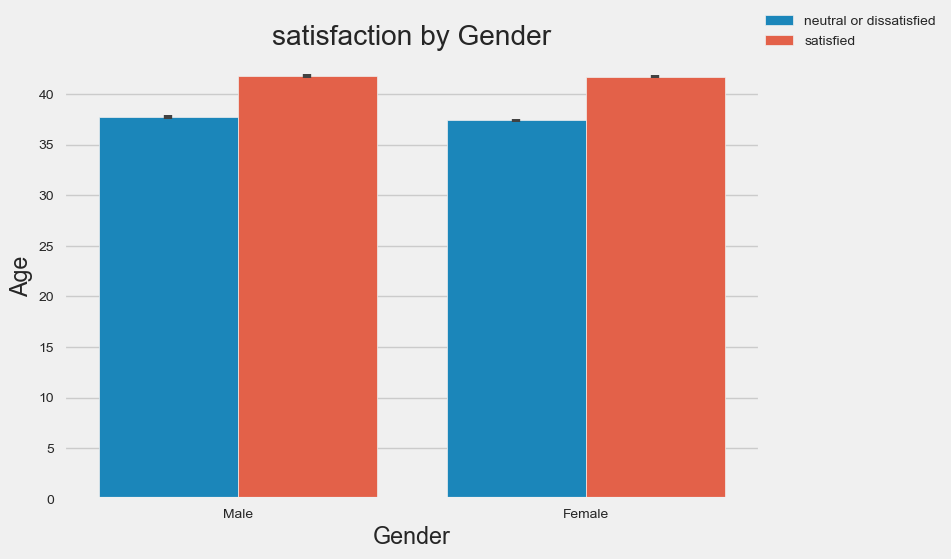

In [43]:
plt.style.use('fivethirtyeight')
sns.barplot(y = df['Age'],x = df['Gender'], hue ='satisfaction', data = df )
plt.legend(loc=(1,1))
plt.title('satisfaction by Gender')


Text(0.5, 1.0, 'satisfaction based on Customer Type')

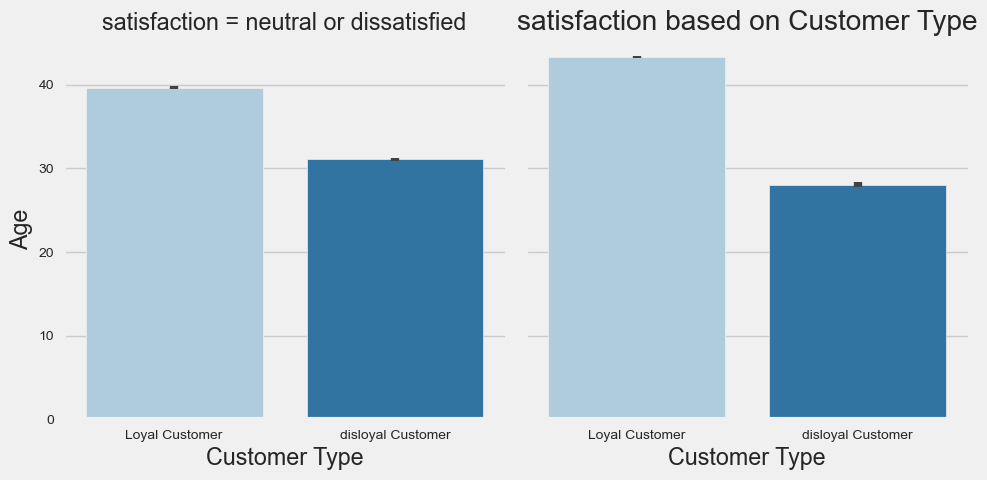

In [44]:
sns.catplot(y = df['Age'], x = df['Customer Type'],col = 'satisfaction', kind = 'bar', data = df, palette = 'Paired')
plt.title('satisfaction based on Customer Type')

Text(0.5, 1.0, 'satisfaction based on Type of Travel\t')

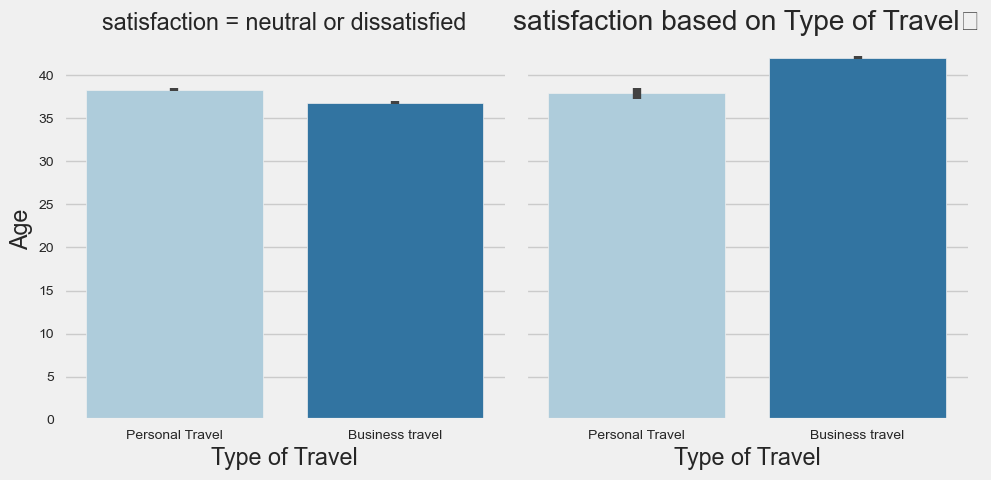

In [45]:
sns.catplot(y = df['Age'], x = df['Type of Travel'],col = 'satisfaction', kind = 'bar', data = df, palette = 'Paired')
plt.title('satisfaction based on Type of Travel	')

In [46]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

Text(0.5, 1.0, 'Class level')

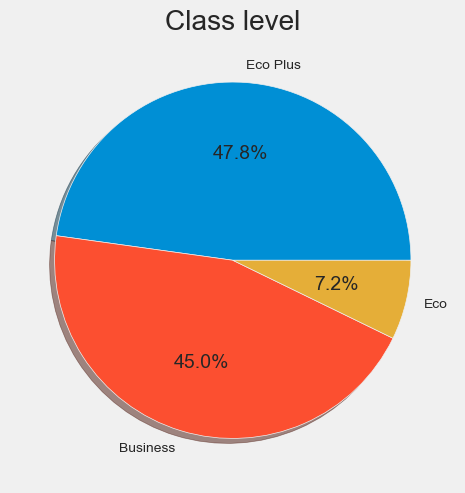

In [47]:
plt.pie(df.Class.value_counts(), autopct = '%1.1f%%',shadow = True ,labels = ['Eco Plus', 'Business', 'Eco'])
plt.title('Class level')

<Axes: xlabel='Class', ylabel='Age'>

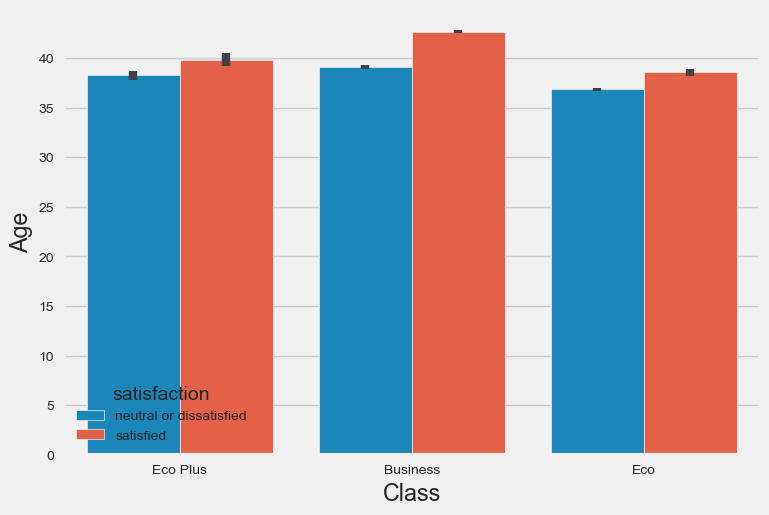

In [48]:
sns.barplot(y = df['Age'], x = df['Class'], hue = 'satisfaction', data = df)

### Dealing with numerical data:

In [49]:
num_values

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


<Axes: xlabel='Flight Distance', ylabel='Density'>

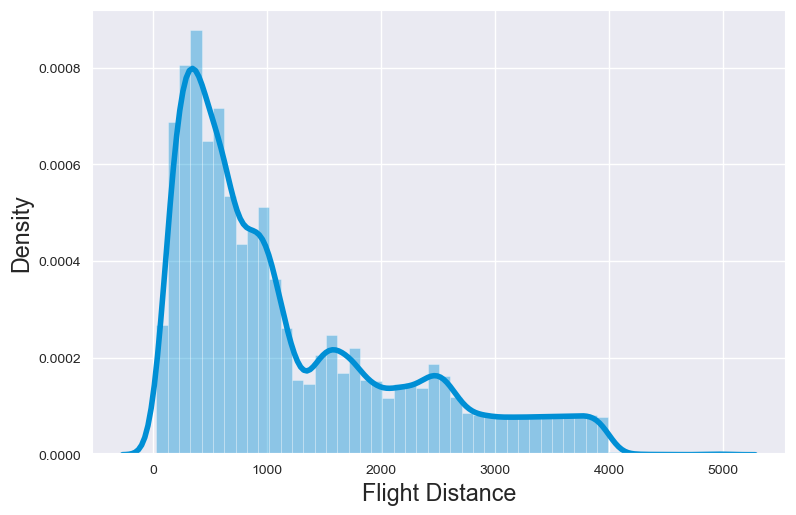

In [50]:
sns.set_style('darkgrid')    
sns.distplot(df['Flight Distance'])

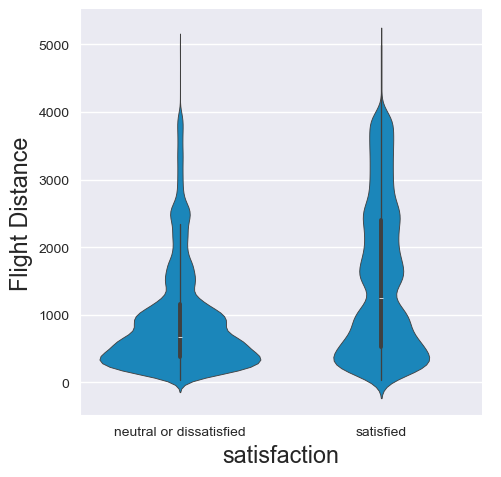

In [51]:
# Get the full smmary of the data and distribution
sns.catplot(y = df['Flight Distance'], x = df['satisfaction'], kind = 'violin') 

In [52]:
rated_col = df.iloc[:,8:]
rated_col

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,satisfied
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


In [53]:
# plt.style.use('seaborn-v0_8')
# fig, ax = plt.subplots()
# for i, col in enumerate(rated_col):
#     sns.countplot(x = col, hue = 'satisfaction', data = df, ax = ax)
#     ax.set_title(f'Satisfaction based on {col}')

In [54]:
# fig, axes = plt.subplots(nrows=len(rated_col), figsize=(6, 4 * len(rated_col)))  # Create multiple subplots

# # If only one column exists, axes will be a single object, not a list
# if len(rated_col) == 1:
#     axes = [axes]

# for i, col in enumerate(rated_col):
#     sns.countplot(x=col, hue='satisfaction', data=df, ax=axes[i])
#     axes[i].set_title(f'Satisfaction based on {col}')
#     axes[i].set_xlabel(col)

In [55]:
# fig, ax = plt.subplots(4,4,figsize=(30,20))
# fig, ax1 = plt.subplots()
# fig, ax2 = plt.subplots()
# sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Gate location', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Food and drink', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Online boarding', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'On-board service', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Baggage handling', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Checkin service', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Inflight service', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Cleanliness', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Departure Delay in Minutes', hue = 'satisfaction', data = df, ax = ax)
# sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = df, ax = ax1)
# sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', data = df, ax = ax2)

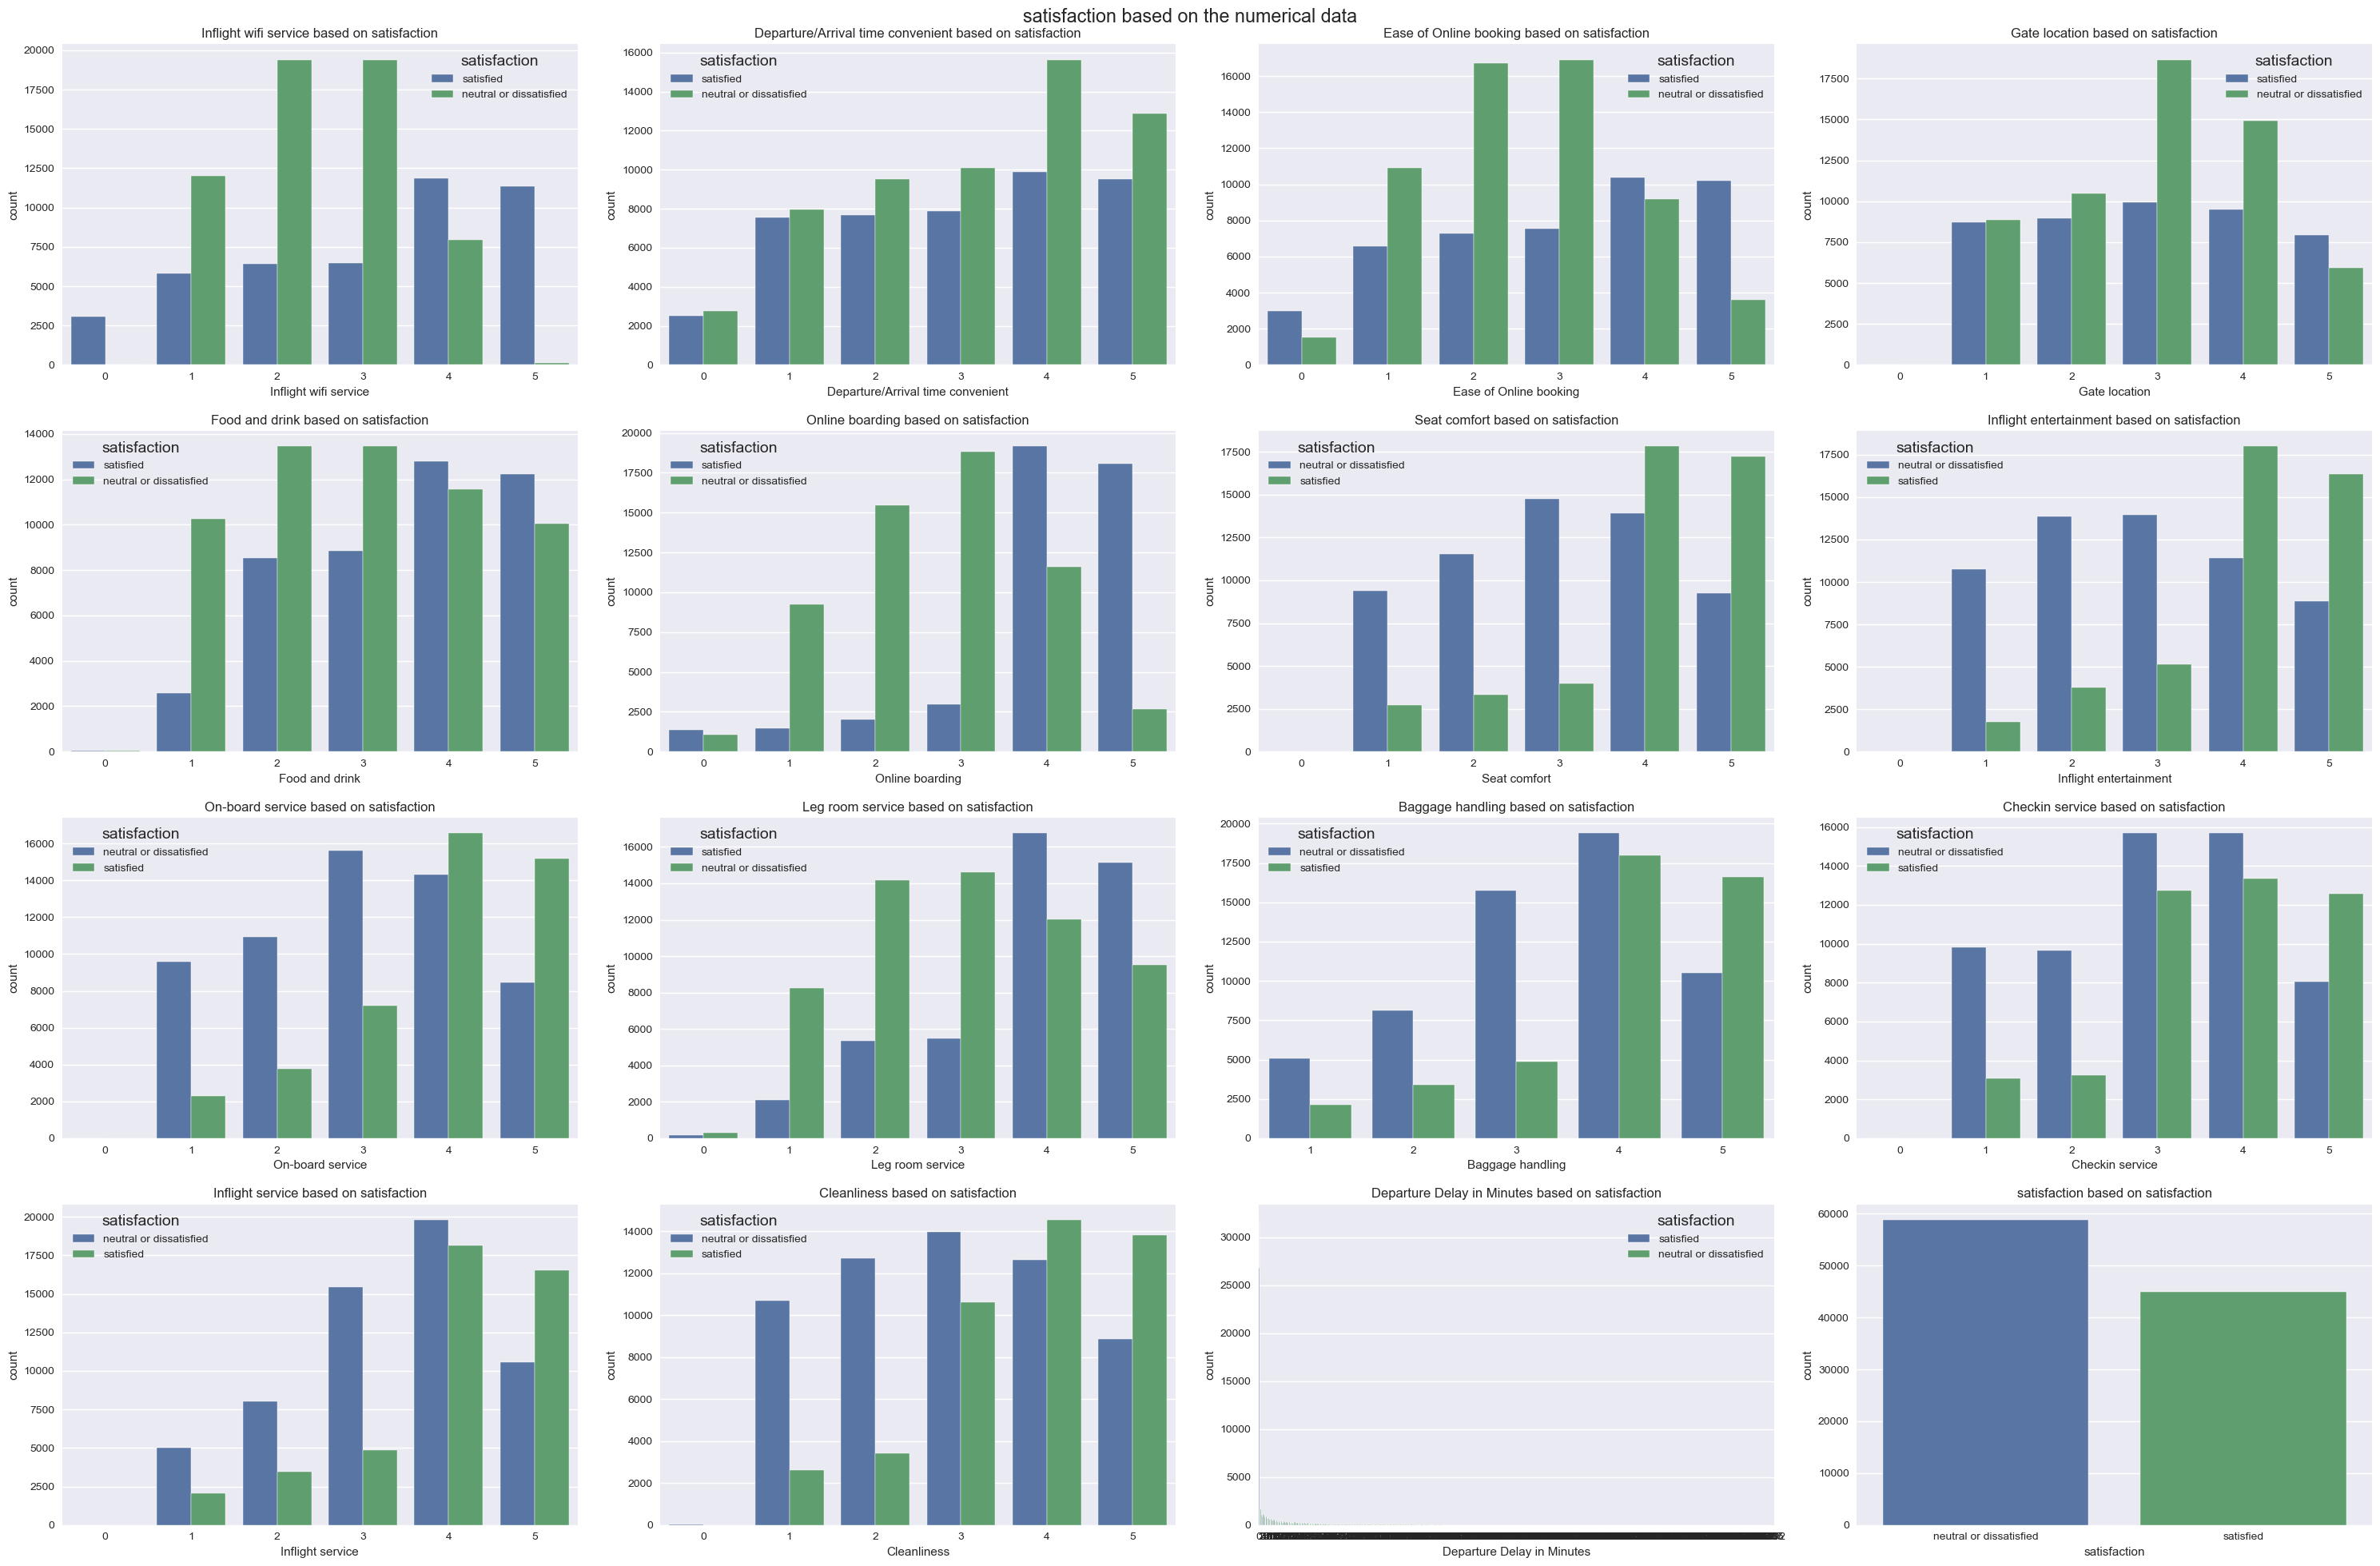

In [56]:
plt.style.use('seaborn-v0_8')
fig,ax=plt.subplots(4,4,figsize=(30,20))
plt.suptitle('satisfaction based on the numerical data')
for i ,col in enumerate(rated_col):
    
    sns.countplot(data=df,x=col,hue='satisfaction',ax=ax[i//4,i%4])
    ax[i//4,i%4].set_title(f'{col} based on satisfaction')
    
plt.tight_layout()
plt.show()
